In [1]:
# utility modules
import re
import numpy as np
import pandas as pd

In [2]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# nltk
from nltk.stem import WordNetLemmatizer

In [4]:
# sklearn models
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

# sklearn functions
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
import pandas as pd

# dataset
data_col = ["sentiment", "ids", "date", "flag", "user", "text"]
data_encoding = "ISO-8859-1"

# read csv
file_path = "C:\\Users\\Sumail\\Downloads\\training.1600000.processed.noemoticon.csv"
df = pd.read_csv(file_path, names=data_col, encoding=data_encoding)


In [6]:
# print dataset head
df.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
# filter necessary columns - 'sentiment' and 'text'
df = df[['sentiment', 'text']]

In [8]:
df.columns

Index(['sentiment', 'text'], dtype='object')

In [9]:
df.shape

(1600000, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   text       1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [11]:
# check for NaN values
df.isnull().any()

sentiment    False
text         False
dtype: bool

In [12]:
# how many values of sentiment
df['sentiment'].unique()

array([0, 4], dtype=int64)

In [13]:
# 0 - negative and 2 - positive for easier understanding
df['sentiment'] = df['sentiment'].replace(4,2)

In [14]:
df.groupby('sentiment').count()

,text
sentiment,
0,800000
2,800000


[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

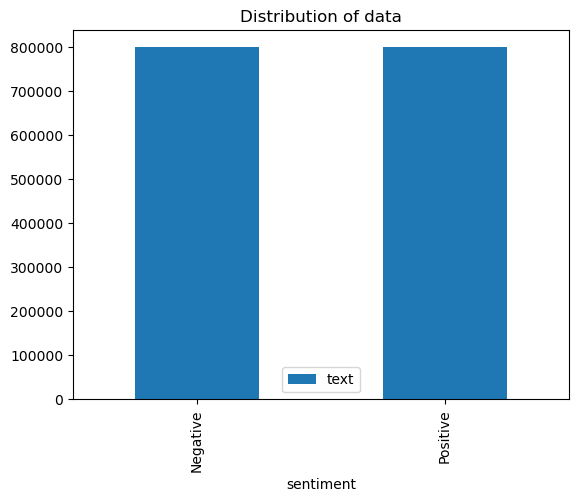

In [15]:
# simple bar plot 
barplot = df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data')
barplot.set_xticklabels(['Negative', 'Positive'])

In [16]:
# convert text to lower case
df['text'] = df['text'].str.lower()
df['text'].head()

0    @switchfoot http://twitpic.com/2y1zl - awww, t...
1    is upset that he can't update his facebook by ...
2    @kenichan i dived many times for the ball. man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object

In [17]:
# now store the columns in py list
text, sentiment = list(df['text']), list(df['sentiment'])

In [18]:
# list of emoji and stopwords to 
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [19]:
# func to preprocess data
def preprocess(text):
    
    wordlemm = WordNetLemmatizer()
    processed = []
    
    # required regex patterns
    url_pattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    user_pattern       = '@[^\s]+'
    alpha_pattern      = "[^a-zA-Z0-9]"
    sequence_pattern   = r"(.)\1\1+"
    seq_replace_pattern = r"\1\1"
    
    for tweet in text:
        
        # replace all urls with 'URL'
        tweet = re.sub(url_pattern, 'URL', tweet)
        
        # replace all emojis
        for emoji in emojis:
            tweet = tweet.replace(emoji, 'EMOJI'+emojis[emoji])
        
        # replace username to 'USER'
        tweet = re.sub(user_pattern, 'USER', tweet)
        
        # replace non alphabets
        tweet = re.sub(alpha_pattern, ' ', tweet)
        
        # replace consevutive letters
        tweet = re.sub(sequence_pattern, seq_replace_pattern, tweet)
        
        x = ''
        for word in tweet.split():
            if(len(word)>1):
                word = wordlemm.lemmatize(word)
                x+=(word+' ')
                
        processed.append(x)
    
    return processed     

In [20]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sumail\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
# pass text list into func
processed_text = preprocess(text)

In [22]:
# seperate negative and positive tweets for wordcloud analysis if required
df.loc[df['sentiment'] == 0]

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,is upset that he can't update his facebook by ...
2,0,@kenichan i dived many times for the ball. man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
799995,0,sick spending my day laying in bed listening ...
799996,0,gmail is down?
799997,0,rest in peace farrah! so sad
799998,0,@eric_urbane sounds like a rival is flagging y...


In [23]:
# split data into training and testing datasets
from sklearn.model_selection import train_test_split as tts
tX, vX, ty, vy = tts(processed_text, sentiment, test_size=0.1, random_state=7)

In [24]:
# import function
from sklearn.feature_extraction.text import TfidfVectorizer as tfidfv

vectoriser = tfidfv(ngram_range=(1,2), max_features=500000)
vectoriser.fit(tX)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [25]:
# Transform training datasets
tX = vectoriser.transform(tX)
vX  = vectoriser.transform(vX)

In [26]:
def evaluate(model):
    
    pred = model.predict(vX)
    print(classification_report(vy, pred))
    
    cfm = confusion_matrix(vy, pred)

    categories  = ['Negative','Positive']
    group_names = ['TN','FP', 'FN','TP']
    group_percentages = ['{0:.2%}'.format(value) for value in cfm.flatten() / np.sum(cfm)]
    
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cfm, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     80313
           2       0.80      0.81      0.80     79687

    accuracy                           0.80    160000
   macro avg       0.80      0.80      0.80    160000
weighted avg       0.80      0.80      0.80    160000



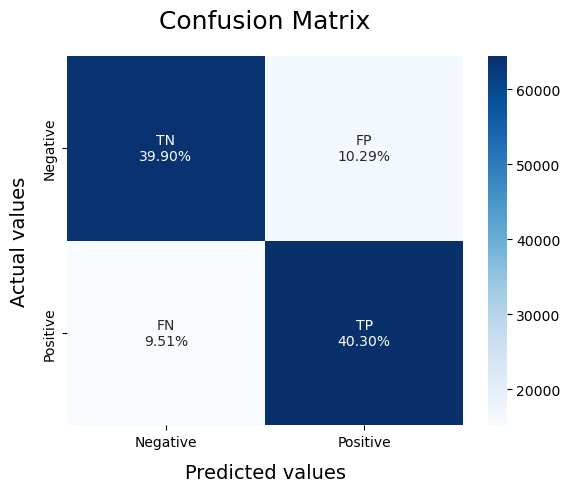

In [27]:
bnb = BernoulliNB(alpha = 2)
bnb.fit(tX, ty)
evaluate(bnb)

C:\Users\Sumail\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.82      0.81      0.81     80313
           2       0.81      0.82      0.82     79687

    accuracy                           0.82    160000
   macro avg       0.82      0.82      0.82    160000
weighted avg       0.82      0.82      0.82    160000



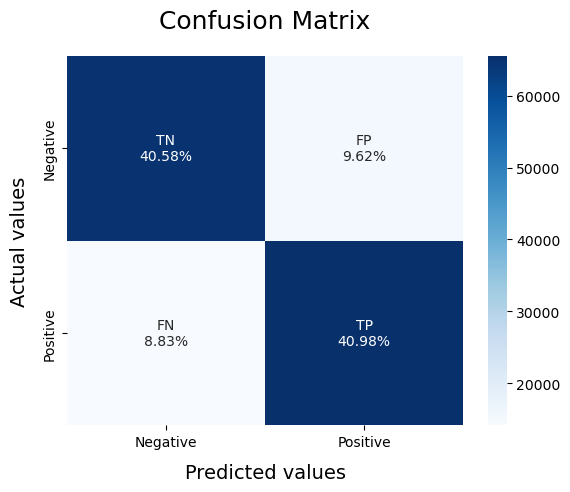

In [28]:
lsvc = LinearSVC()
lsvc.fit(tX, ty)
evaluate(lsvc)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     80313
           2       0.82      0.83      0.83     79687

    accuracy                           0.83    160000
   macro avg       0.83      0.83      0.83    160000
weighted avg       0.83      0.83      0.83    160000



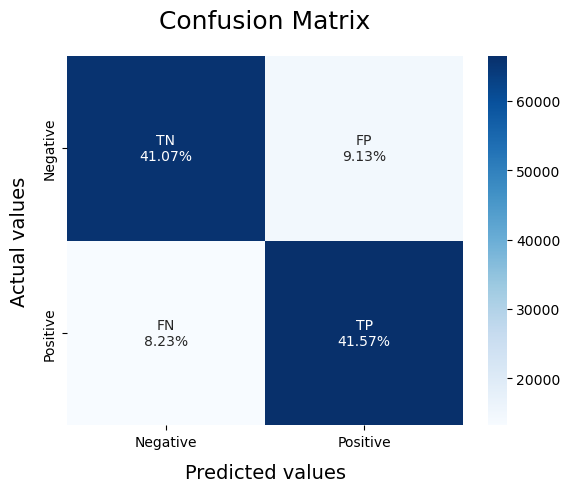

In [29]:
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
lr.fit(tX, ty)
evaluate(lr)

In [30]:
import pickle

file = open("C:/Users/Sumail/Downloads/Twitter Sentiment Analysis/LR.pickle",'wb')
pickle.dump(lr, file)
file.close()

file = open("C:/Users/Sumail/Downloads/Twitter Sentiment Analysis/vectoriser.pickle",'wb')
pickle.dump(vectoriser, file)
file.close()

In [31]:
def load_models():
    
    # Load the vectoriser.
    file = open("C:/Users/Sumail/Downloads/Twitter Sentiment Analysis/vectoriser.pickle", 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open("C:/Users/Sumail/Downloads/Twitter Sentiment Analysis/LR.pickle", 'rb')
    lr = pickle.load(file)
    file.close()
    
    return vectoriser, lr

In [32]:
def predict(vectoriser, model, text):
    
    # Predict the sentiment
    textdata = vectoriser.transform(preprocess(text))
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,2], ["Negative","Positive"])
    
    return df

In [33]:
text = ["Sagar is the best player I know", 'nah, man not the best but yeah he is okay']

df = predict(vectoriser, lr, text)
print(df.head())

                                        text sentiment
0            Sagar is the best player I know  Positive
1  nah, man not the best but yeah he is okay  Negative


In [34]:
text = ['why is he always doing the same thing?', 'i have never seen anyone run that fast']
v, lr = load_models()

In [35]:
df = predict(v, lr, text)
df.head()

,text,sentiment
0,why is he always doing the same thing?,Negative
1,i have never seen anyone run that fast,Positive
